<a href="https://colab.research.google.com/github/Sukruth99/cs666student/blob/main/CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

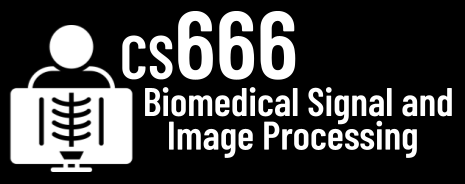
#Assignment 4

In [ ]:
# NAME: SUKRUTH KOTTURU

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [57]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [58]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [60]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [61]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

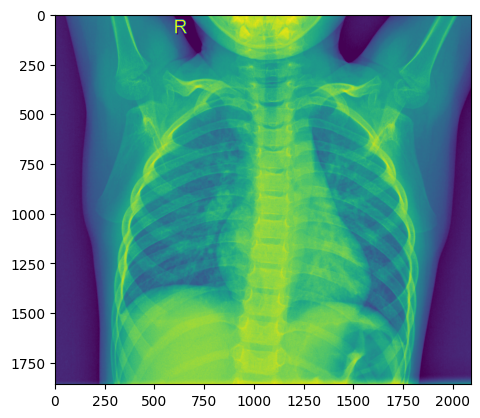

Image dimensions: (1858, 2090)


In [62]:
# TODO: YOUR CODEimport matplotlib.pyplot as plt
plt.imshow(img)
#plt.imshow(img, cmap="gray") for better gray scale image. Can use "jet"
plt.show()
print('Image dimensions:', img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [63]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER : creates a list called data which contains three empty sub-lists.
# These sub-lists are intended to hold image data from the normal/, pneumonia/, and covid/ directories respectively.
#It employs the os.listdir() method to retrieve a list of all files within a directory. Then, it sets up a NumPy array with
# dimensions of 300x300 pixels, and a number of rows that equals the number of files present in the directory.

# TODO: Operation 2) YOUR ANSWER: It uses mahotas.imread() to load the image file into a NumPy array.
#If the loaded image has more than two dimensions (i.e., it's a color image), it converts it to grayscale using mahotas.colors.rgb2gray()

# TODO: Operation 3) YOUR ANSWER : It resizes the image to 300x300 pixels using mahotas.imresize().
#It stores the image data in the NumPy array at the appropriate row index, starting at column 0 and extending to the end of the image data.

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

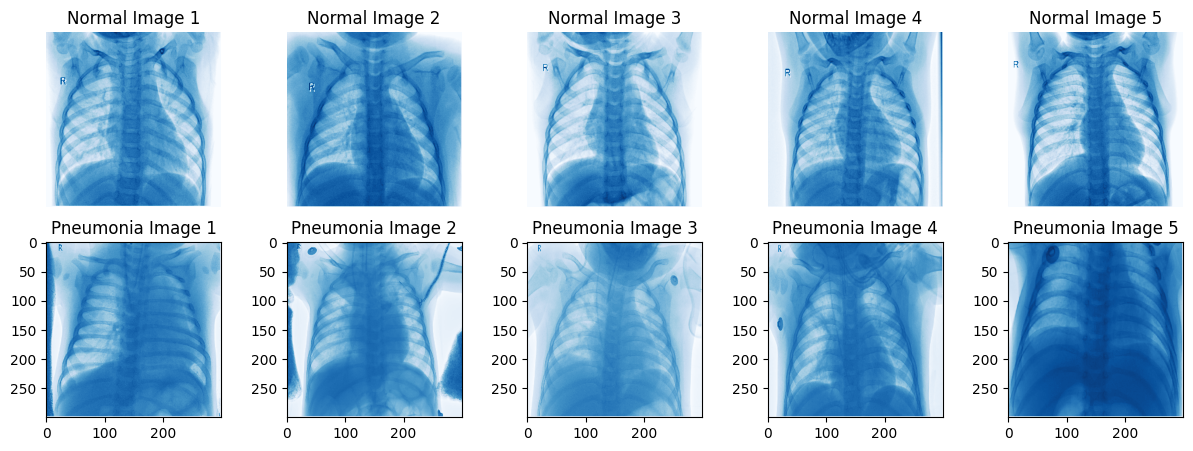

In [64]:
# TODO: YOUR CODE
import matplotlib.pyplot as plt

photo, ph = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

for i in range(5):
    ph[0,i].imshow(data[0][i], cmap='Blues')
    ph[0,i].set_title('Normal Image {}'.format(i+1))
    ph[0,i].axis('off')
    # Cant see the tittle for pneumonia images , hence removed the scale.

    ph[1,i].imshow(data[1][i], cmap='Blues')
    ph[1,i].set_title('Pneumonia Image {}'.format(i+1))
    

plt.show()
# referred 2nd method  from stack ovverflow.

**Task 3:** Setup training and testing data. [15 Points]

In [65]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [84]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1
    

In [67]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
#y_train = np.zeros(TRAINING_COUNT * 3, dtype=np.uint8)
#y_train[:TRAINING_COUNT] = 0 # for normal images
#y_train[TRAINING_COUNT:2*TRAINING_COUNT] = 1 # for pneumonia 
#y_train[2*TRAINING_COUNT:] = 2  # for covid 
TRAINING_COUNT = 60
y_train = np.repeat([0, 1, 2], TRAINING_COUNT)
print(y_train)
# refernce : (https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [68]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [69]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
TESTING_COUNT = 40
y_test = np.repeat([0, 1, 2], TESTING_COUNT)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [70]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [71]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [74]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER:  RandomForest builds multiple decision trees at training time and outputs the class that is the mode of the classes (in case of classification) or 
# mean prediction (in case of regression) of the individual decisio trees. During the training process, each tree is built using a random subset of the training data and
# a random subset of features, thus avoids overfitting.

In [75]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: YOUR ANSWER :  The accuracy of this randomforest model classic=fication is very good (100%), which is not common in M L feild.
# I am not surprised as classification problems accuracy tends to be more than that of a regression model

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [79]:
# TODO: YOUR CODE AND YOUR ANSWER

x_test_remaining = np.zeros((TESTING_COUNT, 300*300), dtype=np.float32)

for i, image in enumerate(data[2][100:(100+TESTING_COUNT)]):
    normalized_image = image / np.max(image)
    flattened_image = np.ravel(normalized_image)
    x_test_remaining[i] = flattened_image

y_test_remaining = np.array([2] * TESTING_COUNT)

score = clf.score(x_test_remaining, y_test_remaining)
print(score)




0.9696969696969697


In [82]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?


<ipython-input-86-3104c2036b3f>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != y_test_covid_only)[0]


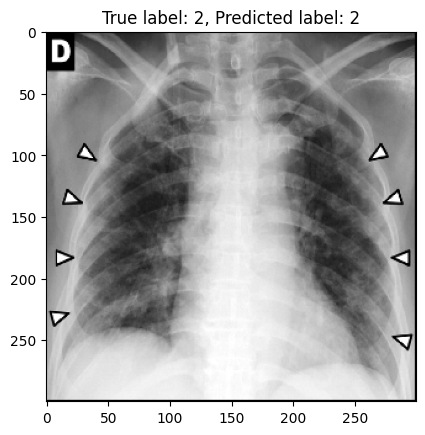

In [86]:
# TODO: YOUR CODE AND YOUR ANSWER
X_test_covid_only = np.zeros((TRAINING_COUNT, 300*300), dtype=np.float32)
t_pos = 0

for image in data[2][:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test_covid_only[t_pos] = image
    t_pos += 1
    y_test_covid_only=np.full(TESTING_COUNT,2)

predictions = clf.predict(X_test_covid_only)
misclassified_indices = np.where(predictions != y_test_covid_only)[0]

for i in misclassified_indices:
    plt.imshow(X_test_covid_only[i].reshape(300, 300), cmap='gray')
    plt.title(f"True label: {y_test_covid_only[i]}, Predicted label: {predictions[i]}")
    plt.show()

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw